# Bombcell Post-Run Analysis (Open Ephys + Kilosort4)

Assumes Bombcell has already been run and you exported per-probe CSV/JSON summaries.

**Expected folder convention**
- `{NP_recording_name}/bombcell_DEFAULT/`
  - `DUPLICATED_KILOSORT4_FILES/`
  - `batch_DEFAULT_results/`
- `{NP_recording_name}/bombcell_NP2.0/`
  - `DUPLICATED_KILOSORT4_FILES_ACD/`
  - `NP2_ReRun_results/`

In [2]:
NP_recording_name = 'Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00'

In [3]:
# New Code
from pathlib import Path

RECORDING_ROOT = Path(r"H:\Grant\Neuropixels\Kilosort_Recordings") / NP_recording_name

BOMBCELL_DEFAULT_ROOT = RECORDING_ROOT / 'bombcell' / "bombcell_DEFAULT"
BOMBCELL_NP20_ROOT = RECORDING_ROOT / 'bombcell'  / "bombcell_NP2.0"
BOMBCELL_SINGLEPROBE_ROOT = RECORDING_ROOT / "bombcell" / "bombcell_single_probe"


DEFAULT_KS_STAGING_ROOT = BOMBCELL_DEFAULT_ROOT 
NP20_KS_STAGING_ROOT = BOMBCELL_NP20_ROOT 
BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT = BOMBCELL_SINGLEPROBE_ROOT 

DEFAULT_EXPORT_ROOT = BOMBCELL_DEFAULT_ROOT / "batch_DEFAULT_results"
NP20_EXPORT_ROOT = BOMBCELL_NP20_ROOT / "NP2_ReRun_results"
SINGLE_EXPORT_ROOT = BOMBCELL_SINGLEPROBE_ROOT / "single_probe_results"

# Make sure they exist
for p in [
    DEFAULT_KS_STAGING_ROOT,
    NP20_KS_STAGING_ROOT,
    BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT,
    DEFAULT_EXPORT_ROOT,
    NP20_EXPORT_ROOT,
    SINGLE_EXPORT_ROOT

]:
    p.mkdir(parents=True, exist_ok=True)
    print(p)


H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_DEFAULT
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_NP2.0
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_DEFAULT\batch_DEFAULT_results
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_NP2.0\NP2_ReRun_results
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\single_probe_results


In [4]:
probeA_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA'
probeB_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP'
probeC_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeC'
probeD_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD'
probeE_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeE-AP'
probeF_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeF-AP'

structur_oebin = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\structure.oebin'

probeA_continousDir = probeA_Dir + r'\continuous.dat'
probeB_continousDir = probeB_Dir + r'\continuous.dat'
probeC_continousDir = probeC_Dir + r'\continuous.dat'
probeD_continousDir = probeD_Dir + r'\continuous.dat'
probeE_continousDir = probeE_Dir + r'\continuous.dat'
probeF_continousDir = probeF_Dir + r'\continuous.dat'

continousDir = [probeA_continousDir,probeB_continousDir,probeC_continousDir,probeD_continousDir,probeE_continousDir,probeF_continousDir]
probeLetters = ['A','B','C','D','E','F']

In [5]:
# =========================
# Configure
# =========================
from pathlib import Path
import pandas as pd
import numpy as np
import json

PROBES_ALL  = ["A","B","C","D","E","F"]
PROBES_NP20 = ["A","C","D"]

print("RECORDING_ROOT:", RECORDING_ROOT)
print("DEFAULT_EXPORT_ROOT exists:", DEFAULT_EXPORT_ROOT.exists())
print(DEFAULT_EXPORT_ROOT)
print("NP20_EXPORT_ROOT exists:", NP20_EXPORT_ROOT.exists())
print(NP20_EXPORT_ROOT)
print("SINGLE_EXPORT_ROOT exists:", SINGLE_EXPORT_ROOT.exists())
print(SINGLE_EXPORT_ROOT)

RECORDING_ROOT: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00
DEFAULT_EXPORT_ROOT exists: True
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_DEFAULT\batch_DEFAULT_results
NP20_EXPORT_ROOT exists: True
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_NP2.0\NP2_ReRun_results
SINGLE_EXPORT_ROOT exists: True
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\single_probe_results


In [6]:
# =========================
# Helpers
# =========================
def load_probe_exports(export_root: Path, probe: str):
    # Loads Probe_{probe} exports: quality_metrics.csv, unit_type_counts.csv, param.json, checks.json.
    probe_dir = export_root / f"Probe_{probe}"
    qm_path = probe_dir / f"Probe_{probe}_quality_metrics.csv"
    counts_path = probe_dir / f"Probe_{probe}_unit_type_counts.csv"
    param_path = probe_dir / f"Probe_{probe}_param.json"
    checks_path = probe_dir / f"Probe_{probe}_checks.json"
    err_path = probe_dir / "ERROR.txt"

    if err_path.exists():
        return {"probe": probe, "status": "FAILED", "error": err_path.read_text(), "probe_dir": probe_dir}

    out = {"probe": probe, "status": "OK", "probe_dir": probe_dir}
    out["qm"] = pd.read_csv(qm_path) if qm_path.exists() else None
    out["counts"] = pd.read_csv(counts_path) if counts_path.exists() else None
    out["param"] = json.loads(param_path.read_text()) if param_path.exists() else {}
    out["checks"] = json.loads(checks_path.read_text()) if checks_path.exists() else {}

    out["cluster_id_col"] = None

    out["ks_dir"] = out["checks"].get("ks_dir", None)
    out["save_path"] = out["checks"].get("save_path", None)
    
    if out["qm"] is not None:
        for c in ["cluster_id","clusterID","cluster_id_ks","cluster_id_phy","cluster"]:
            if c in out["qm"].columns:
                out["cluster_id_col"] = c
                break

    return out

def load_batch_summary(export_root: Path):
    p = export_root / "batch_summary.csv"
    return pd.read_csv(p) if p.exists() else None

def summarize_unit_types(qm: pd.DataFrame, label_col="Bombcell_unit_type"):
    if qm is None or label_col not in qm.columns:
        return None
    return qm[label_col].value_counts().rename_axis("unit_type").reset_index(name="count")

def add_percentages(df_counts: pd.DataFrame):
    if df_counts is None or df_counts.empty:
        return df_counts
    total = df_counts["count"].sum()
    df_counts = df_counts.copy()
    df_counts["pct"] = 100 * df_counts["count"] / total
    return df_counts

def find_cluster_row(qm: pd.DataFrame, cluster_id: int, cluster_id_col: str):
    if qm is None:
        raise ValueError("qm is None")
    if cluster_id_col is None or cluster_id_col not in qm.columns:
        raise ValueError("No cluster_id column found in quality_metrics.csv")
    sub = qm.loc[qm[cluster_id_col] == cluster_id]
    if sub.empty:
        raise KeyError(f"Cluster id {cluster_id} not found in {cluster_id_col}")
    return sub.iloc[0]

def threshold_fail_report(row, qm_cols, param):
    # Common Bombcell gates; only checks metrics that exist in the CSV.
    rules = [
        ("rawAmplitude", "<", param.get("minAmplitude", 40)),
        ("signalToNoiseRatio", "<", param.get("minSNR", 5)),
        ("presenceRatio", "<", param.get("minPresenceRatio", 0.7)),
        ("fractionRPVs_estimatedTauR", ">", param.get("maxRPVviolations", 0.1)),
        ("percentageSpikesMissing_gaussian", ">", param.get("maxPercSpikesMissing", 20)),
        ("waveformDuration_peakTrough", "<", param.get("minWvDuration", 100)),
        ("waveformDuration_peakTrough", ">", param.get("maxWvDuration", 1150)),
        ("nPeaks", ">", param.get("maxNPeaks", 2)),
        ("nTroughs", ">", param.get("maxNTroughs", 1)),
        ("waveformBaselineFlatness", ">", param.get("maxWvBaselineFraction", 0.3)),
    ]
    fails = []
    for col, op, thr in rules:
        if col not in qm_cols:
            continue
        v = row[col]
        if pd.isna(v):
            continue
        if (op == "<" and v < thr) or (op == ">" and v > thr):
            fails.append((col, float(v), op, float(thr)))
    return fails

## Load DEFAULT exports (all probes)

In [7]:
default_summary = load_batch_summary(DEFAULT_EXPORT_ROOT)
default_summary

,probe,status,ks_dir,save_path,n_NOISE,n_MUA,n_NON-SOMA,n_GOOD,max_raw_metric_nan_frac
0,A,OK,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,392,109,51,2,0.012635
1,B,OK,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,247,764,286,19,0.002280
2,C,OK,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,154,135,30,36,0.014085
3,D,OK,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,93,540,109,78,0.002439
4,E,OK,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,100,394,251,119,0.008102
5,F,OK,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,H:\Grant\Neuropixels\Kilosort_Recordings\Reach...,95,273,210,113,0.007236


## Load in all Bombcell runs


In [8]:
default_data = {p: load_probe_exports(DEFAULT_EXPORT_ROOT, p) for p in PROBES_ALL}

for p in PROBES_ALL:
    d = default_data[p]
    print(f"Probe {p} ({d['status']})", "="*60)
    if d["status"] != "OK":
        print(d.get("error",""))
        continue
    counts = add_percentages(summarize_unit_types(d["qm"]))
    # display(counts)

Probe A (OK) ============================================================
Probe B (OK) ============================================================
Probe C (OK) ============================================================
Probe D (OK) ============================================================
Probe E (OK) ============================================================
Probe F (OK) ============================================================


## Load NP2.0 Re-run results

In [9]:
np20_summary = load_batch_summary(NP20_EXPORT_ROOT)
np20_data = {p: load_probe_exports(NP20_EXPORT_ROOT, p) for p in PROBES_NP20}

for p in PROBES_NP20:
    d = np20_data[p]
    print(f"Probe {p} ({d['status']})", "="*60)
    if d["status"] != "OK":
        print(d.get("error",""))
        continue
    counts = add_percentages(summarize_unit_types(d["qm"]))
    # display(counts)

Probe A (OK) ============================================================
Probe C (OK) ============================================================
Probe D (FAILED) ============================================================
No quality_metrics found (unknown failure)


## Load single probe data

In [10]:
single_summary = load_batch_summary(SINGLE_EXPORT_ROOT)
single_summary
single_probe_data = {p: load_probe_exports(SINGLE_EXPORT_ROOT, p) for p in PROBES_ALL}

for p in PROBES_ALL:
    d = single_probe_data[p]
    print(f"Probe {p} ({d['status']})", "="*60)
    if d["status"] != "OK":
        print(d.get("error",""))
        continue
    counts = add_percentages(summarize_unit_types(d["qm"]))
    # display(counts)

Probe A (OK) ============================================================
Probe B (OK) ============================================================
Probe C (OK) ============================================================
Probe D (OK) ============================================================
Probe E (OK) ============================================================
Probe F (OK) ============================================================


## Compare all Bombcell runs on same dataset

In [11]:
## ==================================
## Check all probes and all BC session
## ==================================

# OLD CODE
def overview_table(data_dict: dict):
    rows = []
    for p, d in data_dict.items():
        if d.get("status") != "OK":
            rows.append({"probe": p, "status": "FAILED"})
            continue
        qm = d["qm"]
        counts = qm["Bombcell_unit_type"].value_counts()
        total = len(qm)
        row = {
            "probe": p,
            "status": "OK",
            "n_total": int(total),
            "n_GOOD": int(counts.get("GOOD",0)),
            "pct_GOOD": 100*float(counts.get("GOOD",0))/total if total else np.nan,
        }
        rows.append(row)
    return pd.DataFrame(rows)


# NEW CODE
def overview_table(data_dict: dict):
    rows = []
    for p, d in data_dict.items():
        status = d.get("status", "FAILED")

        # Handle missing qm even if status was left as OK
        qm = d.get("qm", None)
        if status != "OK" or qm is None or not hasattr(qm, "columns") or len(qm) == 0:
            rows.append({
                "probe": p,
                "status": "FAILED" if status != "OK" else "NO_QM",
                "n_total": np.nan,
                "n_GOOD": np.nan,
                "pct_GOOD": np.nan,
            })
            continue

        if "Bombcell_unit_type" not in qm.columns:
            rows.append({
                "probe": p,
                "status": "NO_UNIT_TYPE_COL",
                "n_total": int(len(qm)),
                "n_GOOD": np.nan,
                "pct_GOOD": np.nan,
            })
            continue

        counts = qm["Bombcell_unit_type"].value_counts()
        total = len(qm)

        rows.append({
            "probe": p,
            "status": "OK",
            "n_total": int(total),
            "n_GOOD": int(counts.get("GOOD", 0)),
            "pct_GOOD": 100.0 * float(counts.get("GOOD", 0)) / total if total else np.nan,
        })

    return pd.DataFrame(rows)


default_overview = overview_table(default_data)
np20_overview = overview_table(np20_data)
single_probe_overview = overview_table(single_probe_data)
from IPython.display import display

print("DEFAULT overview")
display(default_overview.sort_values("probe"))

print("\nSINGLE_PROBE overview")
display(single_probe_overview.sort_values("probe"))

print("\nNP2.0 overview")
display(np20_overview.sort_values("probe"))




DEFAULT overview


,probe,status,n_total,n_GOOD,pct_GOOD
0,A,OK,554,2,0.361011
1,B,OK,1316,19,1.443769
2,C,OK,355,36,10.140845
3,D,OK,820,78,9.512195
4,E,OK,864,119,13.773148
5,F,OK,691,113,16.353111



SINGLE_PROBE overview


,probe,status,n_total,n_GOOD,pct_GOOD
0,A,NO_QM,NaN,NaN,NaN
1,B,OK,1316.0,425.0,32.294833
2,C,NO_QM,NaN,NaN,NaN
3,D,NO_QM,NaN,NaN,NaN
4,E,NO_QM,NaN,NaN,NaN
5,F,NO_QM,NaN,NaN,NaN



NP2.0 overview


,probe,status,n_total,n_GOOD,pct_GOOD
0,A,OK,554.0,7.0,1.263538
1,C,OK,355.0,59.0,16.619718
2,D,FAILED,NaN,NaN,NaN


## Compare DEFAULT vs Single rerun 

In [12]:
# NEW CODE (replace entire cell)

rows = []

def _get(ct, name):
    if ct is None:
        return 0
    sub = ct.loc[ct["unit_type"] == name, "count"]
    return int(sub.iloc[0]) if len(sub) else 0

for p in PROBES_ALL:
    d_default = default_data.get(p, {})
    d_single  = single_probe_data.get(p, {})

    qm_default = d_default.get("qm", None)
    qm_single  = d_single.get("qm", None)

    # hard guard: skip any probe missing qm
    if qm_default is None or qm_single is None:
        continue

    # optional: also require status OK
    if d_default.get("status") != "OK" or d_single.get("status") != "OK":
        continue

    c_default = summarize_unit_types(qm_default)
    c_single  = summarize_unit_types(qm_single)

    rows.append({
        "probe": p,
        "DEFAULT_GOOD": _get(c_default, "GOOD"),
        "SINGLE_GOOD":  _get(c_single, "GOOD"),
        "DEFAULT_MUA": _get(c_default, "MUA"),
        "SINGLE_MUA":  _get(c_single, "MUA"),
        "DEFAULT_NOISE": _get(c_default, "NOISE"),
        "SINGLE_NOISE":  _get(c_single, "NOISE"),
        "DEFAULT_NON-SOMA": _get(c_default, "NON-SOMA"),
        "SINGLE_NON-SOMA":  _get(c_single, "NON-SOMA"),
        "DEFAULT_TOTAL": int(len(qm_default)),
        "SINGLE_TOTAL":  int(len(qm_single)),
    })

comparison_df = pd.DataFrame(rows).sort_values("probe")
comparison_df


,probe,DEFAULT_GOOD,SINGLE_GOOD,DEFAULT_MUA,SINGLE_MUA,DEFAULT_NOISE,SINGLE_NOISE,DEFAULT_NON-SOMA,SINGLE_NON-SOMA,DEFAULT_TOTAL,SINGLE_TOTAL
0,B,19,425,764,358,247,247,286,286,1316,1316


## Distributions (RPV, presenceRatio)

== Looking at SINGLE run for probe B ==


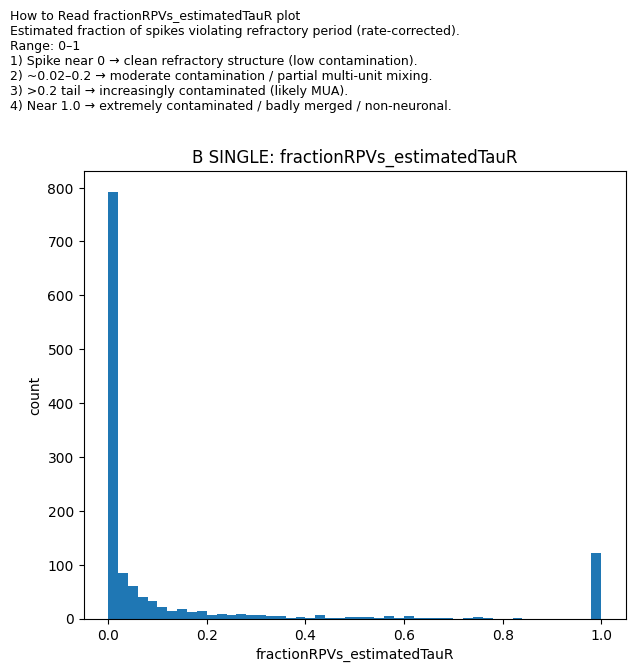

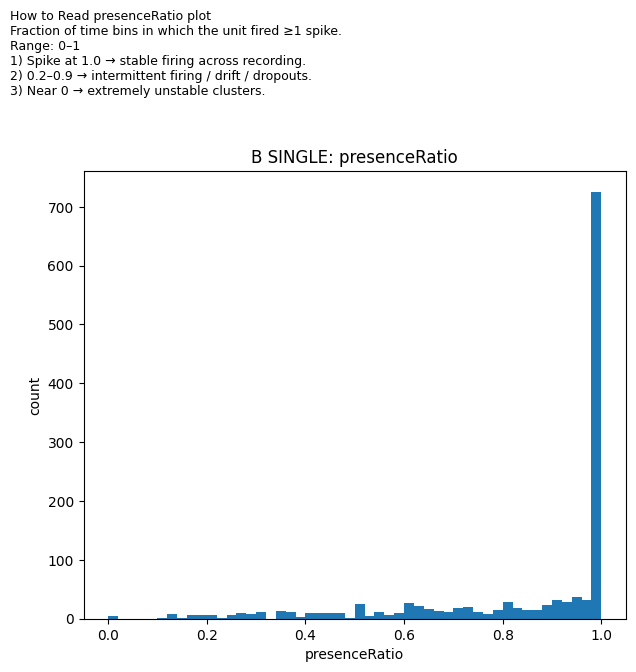

In [13]:
import matplotlib.pyplot as plt

probe = 'B'
run = 'SINGLE'

# --- Select dataset ---
if run == "DEFAULT":  # New Code
    print(f'== Looking at DEFAULT run for probe {probe} ==')
    d = default_data[probe]  # New Code
elif run == "NP20":  # New Code
    print(f'== Looking at NP20 run for probe {probe} ==')
    d = np20_data[probe]  # New Code
elif run == "SINGLE":  # New Code
    print(f'== Looking at SINGLE run for probe {probe} ==')
    d = single_probe_data[probe]  # New Code
else:  # New Code
    raise ValueError("run must be one of: 'DEFAULT', 'NP20', 'SINGLE'")  # New Code
qm = d["qm"]

# # OLD CODE
# for col in ["fractionRPVs_estimatedTauR", "presenceRatio"]:
#     if col in qm.columns:
#         plt.figure()
#         plt.hist(qm[col].dropna(), bins=50)
#         plt.title(f"{probe} {run}: {col}")
#         plt.xlabel(col); plt.ylabel("count")
#         plt.show()

help_text = {
    "fractionRPVs_estimatedTauR": [
        "How to Read fractionRPVs_estimatedTauR plot",
        "Estimated fraction of spikes violating refractory period (rate-corrected).",
        "Range: 0–1",
        "1) Spike near 0 → clean refractory structure (low contamination).",
        "2) ~0.02–0.2 → moderate contamination / partial multi-unit mixing.",
        "3) >0.2 tail → increasingly contaminated (likely MUA).",
        "4) Near 1.0 → extremely contaminated / badly merged / non-neuronal."
    ],
    "presenceRatio": [
        "How to Read presenceRatio plot",
        "Fraction of time bins in which the unit fired ≥1 spike.",
        "Range: 0–1",
        "1) Spike at 1.0 → stable firing across recording.",
        "2) 0.2–0.9 → intermittent firing / drift / dropouts.",
        "3) Near 0 → extremely unstable clusters."
    ],
}

for col in ["fractionRPVs_estimatedTauR", "presenceRatio"]:
    if col in qm.columns:
        fig, ax = plt.subplots(figsize=(7, 7))  # taller figure
        ax.hist(qm[col].dropna(), bins=50)
        ax.set_title(f"{probe} {run}: {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("count")

        lines = help_text.get(col, [])
        if lines:
            fig.subplots_adjust(top=0.75)  # MORE space for text
            fig.text(
                0.02, 0.98,
                "\n".join(lines),
                ha="left", va="top",
                fontsize=9
            )

        plt.show()


### SET the following
1. Probe Letter = 'A', 'B', 'C', 'D', 'E', 'F'
2. BC_SESSION = BOMBCELL_DEFAULT_ROOT / BOMBCELL_NP20_ROOT / BOMBCELL_SINGLEPROBE_ROOT
3. cluster_id = specific unit to check

# ===================================================================
# SINGLE UNIT SELECTION
# ===================================================================

In [14]:
probe = "B"      
cluster_id = 361  # AKA. unitID from kilosort    

run = "SINGLE"      # "DEFAULT" or "NP20" or 'SINGLE'
BC_SESSION = BOMBCELL_SINGLEPROBE_ROOT # BOMBCELL_DEFAULT_ROOT or BOMBCELL_NP20_ROOT or BOMBCELL_SINGLEPROBE_ROOT

# BOMBCELL_DEFAULT_ROOT = RECORDING_ROOT / 'bombcell' / "bombcell_DEFAULT"
# BOMBCELL_NP20_ROOT = RECORDING_ROOT / 'bombcell'  / "bombcell_NP2.0"
# BOMBCELL_SINGLEPROBE_ROOT = RECORDING_ROOT / "bombcell" / "bombcell_single_probe"


# ===================================================================
# SINGLE UNIT SELECTION
# ===================================================================

In [15]:
from pathlib import Path
import pandas as pd

ks_dir = Path(fr"{BC_SESSION}\kilosort4_{probe}")

if ks_dir.exists():
    print(f'Found BC session for probe {probe}')
    print(ks_dir)
else:
    print('No Dir Found')

label_tsv = ks_dir / "cluster_bc_unitType.tsv"
df = pd.read_csv(label_tsv, sep="\t")

# Column is usually 'cluster_id' or 'id'
print(df.columns)

# Try both common names:
if "cluster_id" in df.columns:
    print('cluster_id Found')
    print(df.loc[df["cluster_id"] == cluster_id])
elif "id" in df.columns:
    print(df.loc[df["id"] == cluster_id])
else:
    raise ValueError("Unexpected columns; print(df.head()) and inspect.")


Found BC session for probe B
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_B
Index(['cluster_id', 'bc_unitType'], dtype='str')
cluster_id Found
     cluster_id bc_unitType
359         361       NOISE


## Drill-down: why Bombcell labeled a specific cluster as MUA (or not GOOD)

This reports which thresholds are violated for a chosen `probe` and `cluster_id`.

In [16]:
if run == "DEFAULT":
    print('=== About to Analyze ====')
    print(run, 'BC Session run')
    print('Unit ID: ', cluster_id)
    d = default_data[probe] 
if run == "NP20":
    print('=== About to Analyze ====')
    print(run, 'BC Session run')
    print('Unit ID: ', cluster_id)
    d = np20_data[probe] 
if run == "SINGLE":
    print('=== About to Analyze ====')
    print(run, 'BC Session run')
    print('Unit ID: ', cluster_id)
    d = single_probe_data[probe] 


=== About to Analyze ====
SINGLE BC Session run
Unit ID:  361


#### Load in following results data
1. quality metrics
2. params 

In [17]:
# load CSV
quality_metrics_path = Path(fr"H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\bombcell\bombcell_single_probe\single_probe_results\Probe_{probe}\Probe_{probe}_quality_metrics.csv")
df = pd.read_csv(quality_metrics_path)
# print just the row for cluster_id
df_unit = df[df['phy_clusterID'] == cluster_id]
df_unit

params_json_path = Path(fr"H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\bombcell\bombcell_single_probe\single_probe_results\Probe_{probe}\Probe_{probe}_param.json")
# load params.json
with open(params_json_path, 'r') as f:
    params = json.load(f)

if quality_metrics_path.exists():
    print('Quality Metrics Existis')
else:
    print('NO Quality Metrics')

if params_json_path.exists():
    print('Params JSON Exists')
else:
    print('NO Params JSON')

Quality Metrics Existis
Params JSON Exists


### Save out the Quality Metrics Row for the single unit your looking at

In [18]:
# Save CSV
output_path = fr"H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\bombcell\bombcell_single_probe\single_probe_results\Probe_{probe}\Probe_{probe}_unit_{cluster_id}_quality_metrics.csv"
df_unit.to_csv(output_path, index=False)
print(f"Saved unit quality metrics to: {output_path}")

Saved unit quality metrics to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\single_probe_results\Probe_B\Probe_B_unit_361_quality_metrics.csv


In [19]:
# =========================
# Old code
# if run == "DEFAULT":
#     d = default_data[probe]
# if run == "NP20":
#     d = np20_data[probe]
# if run == "SINGLE":
#     d = single_probe_data[probe]
# ...
# row = find_cluster_row(qm,cluster_id,cluster_id_col)   # fails when cluster_id missing
# =========================

# =========================
# New Code
# =========================
from pathlib import Path  # New Code
import pandas as pd       # New Code
import numpy as np        # New Code

# --- Select dataset ---
if run == "DEFAULT":  # New Code
    d = default_data[probe]  # New Code
elif run == "NP20":  # New Code
    d = np20_data[probe]  # New Code
elif run == "SINGLE":  # New Code
    d = single_probe_data[probe]  # New Code
else:  # New Code
    raise ValueError("run must be one of: 'DEFAULT', 'NP20', 'SINGLE'")  # New Code

qm = d["qm"]  # New Code
param = d["param"]  # New Code

print("Run:", run)  # New Code
print("Probe:", probe)  # New Code
print("Cluster ID:", cluster_id)  # New Code

# --- Ensure cluster_id exists for drill-down ---
cluster_id_col = d.get("cluster_id_col", None)  # New Code

if cluster_id_col is None or cluster_id_col not in qm.columns:  # New Code
    from pathlib import Path  # New Code

    ks_dir = Path(d.get("ks_dir", ""))  # New Code

    # If ks_dir is stale/missing the "\bombcell\" folder, rewrite it.
    if not ks_dir.exists():  # New Code
        s = str(ks_dir)  # New Code
        if "\\bombcell_single_probe\\" in s and "\\bombcell\\bombcell_single_probe\\" not in s:  # New Code
            ks_dir = Path(s.replace("\\bombcell_single_probe\\", "\\bombcell\\bombcell_single_probe\\"))  # New Code

    # Hard fail if still missing
    if not ks_dir.exists():  # New Code
        raise FileNotFoundError(f"ks_dir does not exist (even after rewrite): {ks_dir}")  # New Code

    # Update d so downstream code uses the corrected path
    d["ks_dir"] = str(ks_dir)  # New Code
    cluster_id_col = "cluster_id" if "cluster_id" in d.get("qm", pd.DataFrame()).columns else d.get("cluster_id_col", None)  # New Code

    print("Using ks_dir:", ks_dir)  # New Code

    label_tsv = ks_dir / "cluster_bc_unitType.tsv"  # New Code

    if not ks_dir.exists():  # New Code
        raise FileNotFoundError(f"Missing d['ks_dir'] or path does not exist: {ks_dir}")  # New Code
    if not label_tsv.exists():  # New Code
        raise FileNotFoundError(f"Missing cluster_bc_unitType.tsv at: {label_tsv}")  # New Code

    lab = pd.read_csv(label_tsv, sep="\t")  # New Code
    if "cluster_id" not in lab.columns:  # New Code
        raise ValueError(f"cluster_bc_unitType.tsv has no 'cluster_id'. Columns: {list(lab.columns)}")  # New Code

    # Attach cluster_id by row order (best available if cluster_info.tsv was not exported)
    cluster_ids = lab["cluster_id"].to_numpy().astype(int)  # New Code
    if len(cluster_ids) != len(qm):  # New Code
        raise ValueError(f"Length mismatch: qm={len(qm)} vs TSV={len(cluster_ids)}; cannot attach cluster_id safely.")  # New Code

    qm = qm.copy()  # New Code
    qm.insert(0, "cluster_id", cluster_ids)  # New Code
    cluster_id_col = "cluster_id"  # New Code

# --- Fetch the row and report ---
row = find_cluster_row(qm, cluster_id, cluster_id_col)  # New Code
print("Bombcell label:", row.get("Bombcell_unit_type", "UNKNOWN"))  # New Code

fails = threshold_fail_report(row, qm.columns, param)  # New Code

print("\n---- FAILING GATES ----")  # New Code
if not fails:  # New Code
    print("No fails among common checks; expand rules or inspect full row.")  # New Code
else:  # New Code
    for col, v, op, thr in fails:  # New Code
        print(f"{col:35s} {v:>10.4f}  FAIL ({op}{thr})")  # New Code

print("\n---- Key values ----")  # New Code
key_cols = [  # New Code
    "rawAmplitude", "signalToNoiseRatio", "presenceRatio",
    "fractionRPVs_estimatedTauR", "percentageSpikesMissing_gaussian",
    "waveformDuration_peakTrough", "nPeaks", "nTroughs", "waveformBaselineFlatness"
]  # New Code
for c in key_cols:  # New Code
    if c in qm.columns:  # New Code
        print(f"{c:35s} {row[c]}")  # New Code


Run: SINGLE
Probe: B
Cluster ID: 361
Bombcell label: NOISE

---- FAILING GATES ----
No fails among common checks; expand rules or inspect full row.

---- Key values ----
rawAmplitude                        93.42803194061048
signalToNoiseRatio                  17.071037313429976
presenceRatio                       1.0
fractionRPVs_estimatedTauR          0.0342767774986209
percentageSpikesMissing_gaussian    1.9027221167685624
waveformDuration_peakTrough         333.3333333333333
nPeaks                              1.0
nTroughs                            1.0
waveformBaselineFlatness            0.0076145031489431


In [20]:
import numpy as np
from pathlib import Path

# ============================
# USER INPUT
# ============================
unit_id = cluster_id
# ============================

print('')
print('======================================================================================================')
print('Probe and Unit Being Analyzed.')
print('======================================================================================================')
print("Analyzing BC Session:", run)  # New Code
print("Probe Being Analyzed:", probe)  # New Code
print('unit being analyzed: ', unit_id)
print('')
print('')
print('======================================================================================================')
print('Main Metrics ')
print('======================================================================================================')

# Load Kilosort outputs
spike_times = np.load(ks_dir / "spike_times.npy").squeeze()
spike_clusters = np.load(ks_dir / "spike_clusters.npy").squeeze()

# Extract spikes for unit
unit_spike_times = spike_times[spike_clusters == unit_id]

print(f"Total spikes for unit {unit_id}: {len(unit_spike_times)}")

# Check monotonicity
is_monotonic = np.all(np.diff(unit_spike_times) >= 0)
print(f"Spike times monotonic increasing: {is_monotonic}")

# Compute ISIs (in samples)
isi = np.diff(unit_spike_times)

# Exact duplicate timestamps (0 sample ISI)
n_zero_isi = np.sum(isi == 0)
print(f"Number of zero-ISI events (exact duplicates): {n_zero_isi}")

# ISIs < 1 sample (should not exist)
n_subsample_isi = np.sum(isi < 0)
print(f"Number of negative ISIs: {n_subsample_isi}")

# Unique spike count
n_unique = len(np.unique(unit_spike_times))
print(f"Unique spike timestamps: {n_unique}")
print(f"Duplicate timestamps: {len(unit_spike_times) - n_unique}")

# Fraction of duplicate spikes
if len(unit_spike_times) > 0:
    frac_duplicates = (len(unit_spike_times) - n_unique) / len(unit_spike_times)
    print(f"Fraction duplicates: {frac_duplicates:.6f}")\

# --- New Code: verify sampling rate and compute simple RPV fractions ---
fs = None  # New Code
for candidate in ["ops.npy", "params.npy"]:  # New Code
    p = ks_dir / candidate  # New Code
    if p.exists():  # New Code
        ops = np.load(p, allow_pickle=True).item()  # New Code
        fs = ops.get("fs", None)  # New Code
        if fs is not None:  # New Code
            break  # New Code

print(f"Detected fs: {fs}")  # New Code
if fs is None:  # New Code
    raise FileNotFoundError("Could not find fs in ops.npy/params.npy. Inspect your Kilosort folder for where fs is stored.")  # New Code

# ISIs in samples and seconds  # New Code
isi_samp = np.diff(unit_spike_times)  # New Code
isi_sec = isi_samp / fs  # New Code

# Plain RPV fractions at canonical refractory windows  # New Code
for r_ms in [0.5, 1.0, 1.5, 2.0]:  # New Code
    r = r_ms / 1000.0  # New Code
    frac = np.mean(isi_sec < r) if len(isi_sec) else np.nan  # New Code
    print(f"Plain RPV fraction (ISI < {r_ms:.1f} ms): {frac:.6f}")  # New Code

# Sanity: report firing rate estimate  # New Code
dur_sec = (unit_spike_times[-1] - unit_spike_times[0]) / fs if len(unit_spike_times) > 1 else np.nan  # New Code
rate_hz = len(unit_spike_times) / dur_sec if dur_sec and dur_sec > 0 else np.nan  # New Code
print(f"Approx duration (sec): {dur_sec:.2f} | mean rate (Hz): {rate_hz:.2f}")  # New Code

print('')
print('======================================================================================================')
print('entire Bombcell qMetrics row + the exact boolean flags used to assign unitType for cluster 361.')
print('======================================================================================================')

# Replace qm_df / bc_df with your actual Bombcell output dataframe name
row = qm.loc[qm["cluster_id"] == 361] if "cluster_id" in qm.columns else qm.loc[361:361]
row.T  # full per-metric view




Probe and Unit Being Analyzed.
Analyzing BC Session: SINGLE
Probe Being Analyzed: B
unit being analyzed:  361


Main Metrics 
Total spikes for unit 361: 103362
Spike times monotonic increasing: True
Number of zero-ISI events (exact duplicates): 0
Number of negative ISIs: 0
Unique spike timestamps: 103362
Duplicate timestamps: 0
Fraction duplicates: 0.000000
Detected fs: 30000
Plain RPV fraction (ISI < 0.5 ms): 0.000677
Plain RPV fraction (ISI < 1.0 ms): 0.001896
Plain RPV fraction (ISI < 1.5 ms): 0.004460
Plain RPV fraction (ISI < 2.0 ms): 0.009781
Approx duration (sec): 9289.58 | mean rate (Hz): 11.13

entire Bombcell qMetrics row + the exact boolean flags used to assign unitType for cluster 361.


,361
Bombcell_unit_type,NOISE
cluster_id,361
row_index,361
phy_clusterID,361
nSpikes,46638.0
nPeaks,1.0
nTroughs,1.0
waveformDuration_peakTrough,333.333333
spatialDecaySlope,0.023944
waveformBaselineFlatness,0.007615


## Metric-by-label medians

In [21]:
# --- Select dataset ---
if run == "DEFAULT":  # New Code
    d = default_data[probe]  # New Code
elif run == "NP20":  # New Code
    d = np20_data[probe]  # New Code
elif run == "SINGLE":  # New Code
    d = single_probe_data[probe]  # New Code
else:  # New Code
    raise ValueError("run must be one of: 'DEFAULT', 'NP20', 'SINGLE'")  # New Code
qm = d["qm"]

metrics = ["fractionRPVs_estimatedTauR","presenceRatio","rawAmplitude","signalToNoiseRatio"]
present = [m for m in metrics if m in qm.columns]
qm.groupby("Bombcell_unit_type")[present].median()

,fractionRPVs_estimatedTauR,presenceRatio,rawAmplitude,signalToNoiseRatio
Bombcell_unit_type,,,,
GOOD,0.001833,1.000000,105.617116,26.026116
MUA,0.020005,0.877500,56.807383,13.800123
NOISE,0.000000,1.000000,99.970672,18.332119
NON-SOMA,0.000000,0.959936,51.848578,12.032534


## Cluster_id check

In [22]:
from pathlib import Path  # New Code
import pandas as pd       # New Code
import numpy as np        # New Code

# --- Select dataset ---
if run == "DEFAULT":  # New Code
    d = default_data[probe]  # New Code
elif run == "NP20":  # New Code
    d = np20_data[probe]  # New Code
elif run == "SINGLE":  # New Code
    d = single_probe_data[probe]  # New Code
else:  # New Code
    raise ValueError("run must be one of: 'DEFAULT', 'NP20', 'SINGLE'")  # New Code

qm = d["qm"]  # New Code
param = d["param"]  # New Code

print("Run:", run)  # New Code
print("Probe:", probe)  # New Code

# --- Ensure cluster_id exists for drill-down ---
cluster_id_col = d.get("cluster_id_col", None)  # New Code

if cluster_id_col is None or cluster_id_col not in qm.columns:  # New Code
    from pathlib import Path  # New Code

    ks_dir = Path(d.get("ks_dir", ""))  # New Code

    # If ks_dir is stale/missing the "\bombcell\" folder, rewrite it.
    if not ks_dir.exists():  # New Code
        s = str(ks_dir)  # New Code
        if "\\bombcell_single_probe\\" in s and "\\bombcell\\bombcell_single_probe\\" not in s:  # New Code
            ks_dir = Path(s.replace("\\bombcell_single_probe\\", "\\bombcell\\bombcell_single_probe\\"))  # New Code

    # Hard fail if still missing
    if not ks_dir.exists():  # New Code
        raise FileNotFoundError(f"ks_dir does not exist (even after rewrite): {ks_dir}")  # New Code

Run: SINGLE
Probe: B


# ==============================================================
# RAW TRACES
# ==============================================================


## open raw trace around spikes for cluster

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_ks4_sorting(folder):
    st = np.load(os.path.join(folder, "spike_times.npy")).astype(np.int64)      # samples
    sc = np.load(os.path.join(folder, "spike_clusters.npy")).astype(np.int64)   # cluster ids
    return st, sc

def get_cluster_spike_times(spike_times, spike_clusters, cluster_id):
    t = spike_times[spike_clusters == int(cluster_id)]
    t.sort()
    return t

def open_memmap_binary(bin_path, n_channels, dtype=np.int16):
    mm = np.memmap(bin_path, dtype=dtype, mode="r")
    n_samp = mm.size // n_channels
    if n_samp * n_channels != mm.size:
        raise ValueError(f"Binary size {mm.size} not divisible by n_channels={n_channels}")
    return mm.reshape(n_samp, n_channels), n_samp

def extract_snippet(mm_2d, center_sample, pre_samp, post_samp, chans):
    start = int(center_sample) - pre_samp
    stop  = int(center_sample) + post_samp
    if start < 0 or stop >= mm_2d.shape[0]:
        return None, None
    snip = mm_2d[start:stop, :][:, chans]
    return snip, start

def plot_raw_snippets_for_cluster(
    ks_folder,
    bin_path,
    cluster_id,
    n_channels,
    fs=30000,
    peak_chan=72,
    neighbor_radius=4,
    n_spikes_to_plot=30,
    pre_ms=2.0,
    post_ms=3.0,
    dtype=np.int16,
    seed=0,
    gain_uV_per_bit=None,   # set if you know it, else leave None
    ignore_edges_s=1.0
):
    spike_times, spike_clusters = load_ks4_sorting(ks_folder)
    t = get_cluster_spike_times(spike_times, spike_clusters, cluster_id)
    if t.size == 0:
        raise ValueError(f"No spikes found for cluster_id={cluster_id}")

    mm, n_samp = open_memmap_binary(bin_path, n_channels, dtype=dtype)

    pre_samp  = int(round(pre_ms  * 1e-3 * fs))
    post_samp = int(round(post_ms * 1e-3 * fs))
    win = pre_samp + post_samp

    # channels to show
    peak_chan = int(peak_chan)
    chans = np.arange(max(0, peak_chan - neighbor_radius), min(n_channels, peak_chan + neighbor_radius + 1))
    if peak_chan not in chans:
        chans = np.sort(np.unique(np.append(chans, peak_chan)))

    # avoid edges
    edge = int(ignore_edges_s * fs)
    valid = t[(t > edge + pre_samp) & (t < (n_samp - edge - post_samp - 1))]
    if valid.size == 0:
        raise ValueError("No spikes remain after edge exclusion; reduce ignore_edges_s or window size.")

    rng = np.random.default_rng(seed)
    pick = valid if valid.size <= n_spikes_to_plot else rng.choice(valid, size=n_spikes_to_plot, replace=False)
    pick.sort()

    # collect snippets
    snippets = []
    for s in pick:
        snip, start = extract_snippet(mm, s, pre_samp, post_samp, chans)
        if snip is None:
            continue
        snippets.append(snip)

    if len(snippets) == 0:
        raise RuntimeError("Failed to extract any snippets (likely edge/window issue).")

    X = np.stack(snippets, axis=0)  # (n_spikes, win, n_chans)

    if gain_uV_per_bit is not None:
        X = X.astype(np.float32) * float(gain_uV_per_bit)

    t_ms = (np.arange(win) - pre_samp) * 1e3 / fs

    # 1) Overlay plot per channel (all chosen spikes)
    fig, axes = plt.subplots(len(chans), 1, figsize=(10, 1.6 * len(chans)), sharex=True)
    if len(chans) == 1:
        axes = [axes]
    for i, ch in enumerate(chans):
        axes[i].plot(t_ms, X[:, :, i].T, linewidth=0.5, alpha=0.25)
        axes[i].axvline(0, linewidth=1)
        axes[i].set_ylabel(f"ch {ch}")
    axes[-1].set_xlabel("time (ms)")
    fig.suptitle(f"Raw trace snippets around spikes: cluster {cluster_id} (n={X.shape[0]})")
    plt.tight_layout()
    plt.show()

    # 2) Mean waveform across snippets (per channel)
    m = X.mean(axis=0)  # (win, n_chans)
    fig, axes = plt.subplots(len(chans), 1, figsize=(10, 1.4 * len(chans)), sharex=True)
    if len(chans) == 1:
        axes = [axes]
    for i, ch in enumerate(chans):
        axes[i].plot(t_ms, m[:, i], linewidth=1.5)
        axes[i].axvline(0, linewidth=1)
        axes[i].set_ylabel(f"ch {ch}")
    axes[-1].set_xlabel("time (ms)")
    fig.suptitle(f"Mean raw waveform: cluster {cluster_id}")
    plt.tight_layout()
    plt.show()

    return {
        "cluster_id": int(cluster_id),
        "n_spikes_total": int(t.size),
        "n_spikes_plotted": int(X.shape[0]),
        "channels_shown": chans,
        "fs": fs,
        "pre_ms": pre_ms,
        "post_ms": post_ms,
    }





## Set Target Probe Data

In [30]:
TARGET_PROBE = 'B'

In [31]:
continousDir = [probeA_continousDir,probeB_continousDir,probeC_continousDir,probeD_continousDir,probeE_continousDir,probeF_continousDir]

# =========================
# New Code (place near the top, after NP_recording_name + probe dirs are defined)
# =========================
from pathlib import Path  # New Code


RECORDING_ROOT = Path(r"H:\Grant\Neuropixels\Kilosort_Recordings") / NP_recording_name  # New Code
SINGLEPROBE_ROOT = RECORDING_ROOT / "bombcell"/ "bombcell_single_probe"  # New Code

SINGLEPROBE_KS_ROOT = SINGLEPROBE_ROOT # New Code
SINGLEPROBE_EXPORT_ROOT = SINGLEPROBE_ROOT / "single_probe_results"  # New Code

SINGLEPROBE_KS_ROOT.mkdir(parents=True, exist_ok=True)  # New Code
SINGLEPROBE_EXPORT_ROOT.mkdir(parents=True, exist_ok=True)  # New Code


RAW_SRC_MAP = {  # New Code
    "A": probeA_continousDir,
    "B": probeB_continousDir,
    "C": probeC_continousDir,
    "D": probeD_continousDir,
    "E": probeE_continousDir,
    "F": probeF_continousDir,
}

if TARGET_PROBE == 'A':
    idx = 0
if TARGET_PROBE == 'B':
    idx = 1
if TARGET_PROBE == 'C':
    idx = 2
if TARGET_PROBE == 'D':
    idx = 3
if TARGET_PROBE == 'E':
    idx = 4
if TARGET_PROBE == 'F':
    idx = 5

continousDir = [probeA_continousDir,probeB_continousDir,probeC_continousDir,probeD_continousDir,probeE_continousDir,probeF_continousDir]


print("TARGET_PROBE:", TARGET_PROBE)  # New Code
# print("ks_src:", ks_src)  # New Code
# print("ks_dir:", ks_dir)  # New Code
# print("raw_file_path:", raw_file_path)  # New Code
# print("meta_file_path:", meta_file_path)  # New Code
# print("save_path:", save_path)  # New Code


TARGET_PROBE: B


In [32]:
# New Code
from pathlib import Path

RECORDING_ROOT = Path(r"H:\Grant\Neuropixels\Kilosort_Recordings") / NP_recording_name

phy_DEFAULT_ROOT = RECORDING_ROOT / 'bombcell' / "bombcell_DEFAULT"
PHY_NP20_ROOT = RECORDING_ROOT / 'bombcell'  / "bombcell_NP2.0"
PHY_SINGLEPROBE_ROOT = RECORDING_ROOT / "bombcell" / "bombcell_single_probe" 


KS_PHY = PHY_SINGLEPROBE_ROOT / f'kilosort4_{TARGET_PROBE}'
BINARY_DATA = continousDir[idx]

print("TARGET_PROBE:", TARGET_PROBE)
print("KS_PHY:", KS_PHY)
print("BINARY_DATA:", BINARY_DATA)

TARGET_PROBE: B
KS_PHY: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_B
BINARY_DATA: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP\continuous.dat


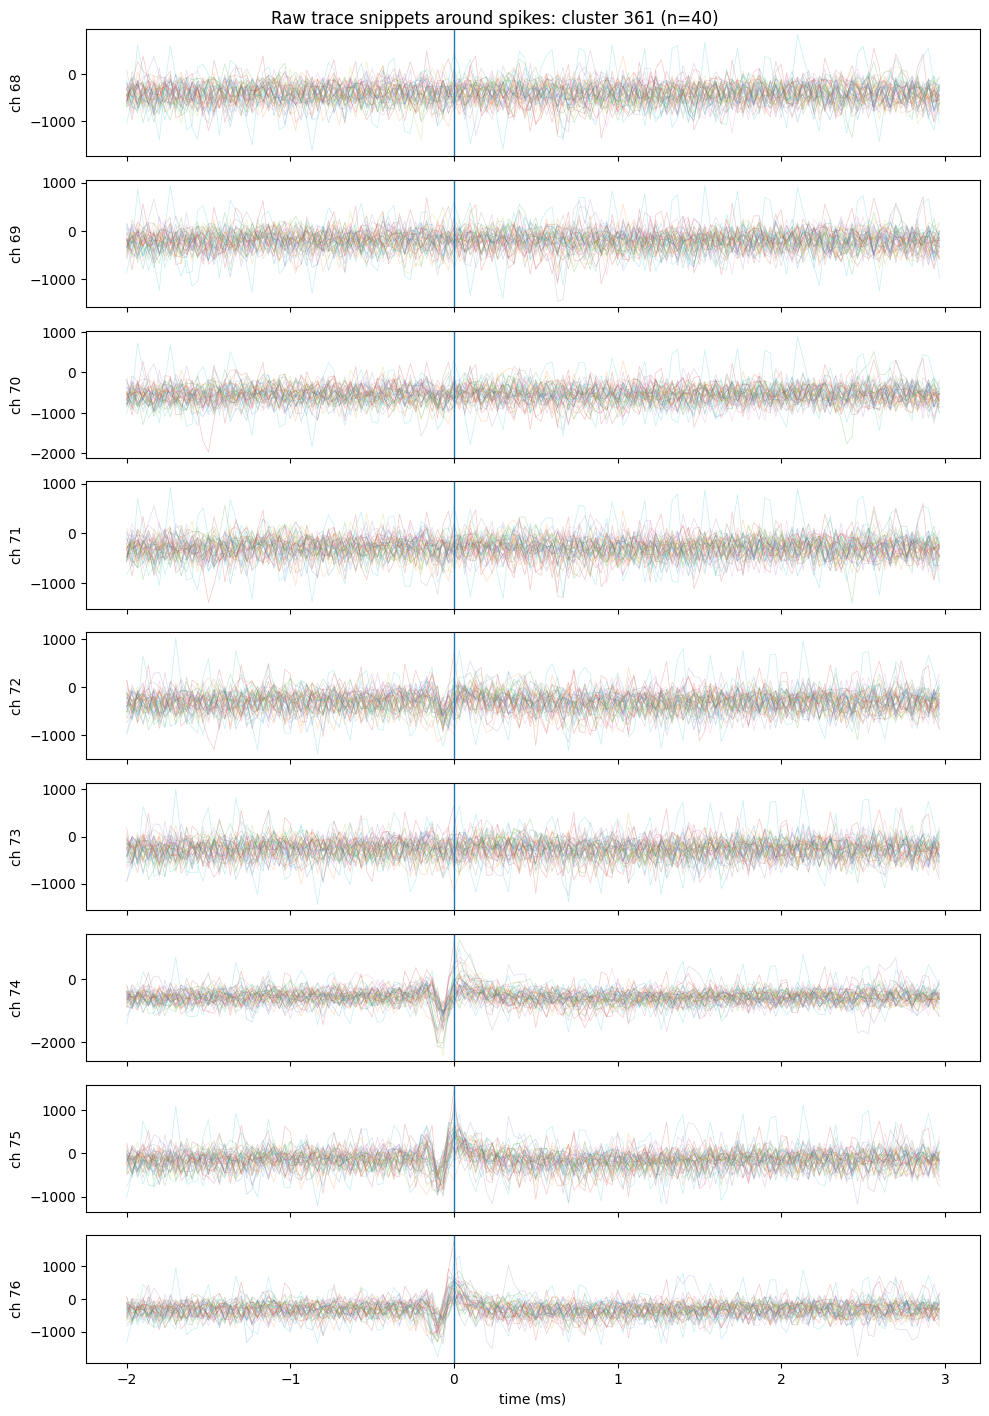

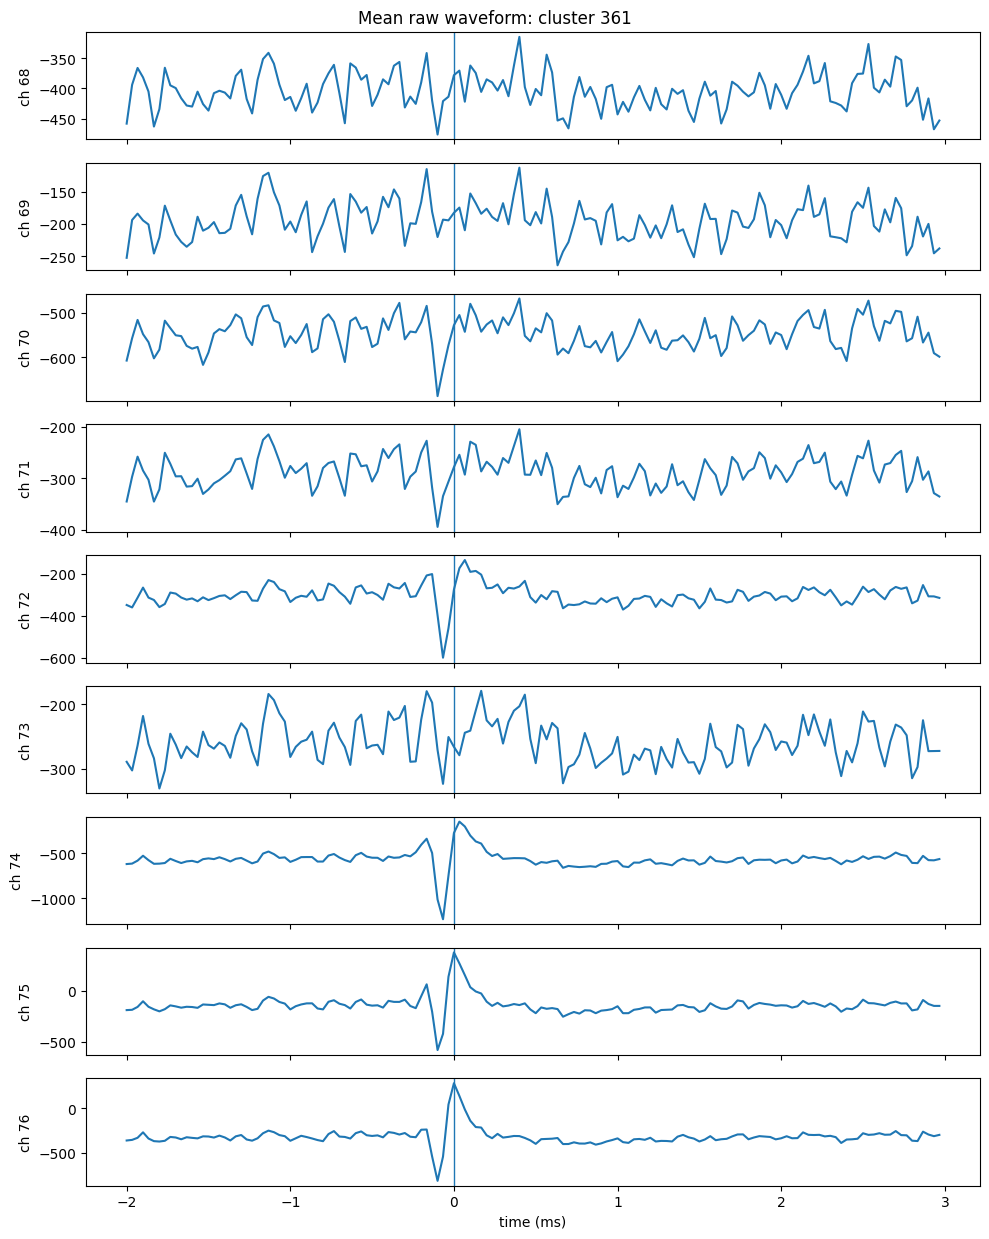

{'cluster_id': 361, 'n_spikes_total': 103362, 'n_spikes_plotted': 40, 'channels_shown': array([68, 69, 70, 71, 72, 73, 74, 75, 76]), 'fs': 30000, 'pre_ms': 2.0, 'post_ms': 3.0}


In [34]:

# SET CLUSTER_UD 
cluster_id = 361


# ===== Example usage (edit paths + n_channels + peak_chan if needed) =====
ks_folder = KS_PHY          # contains spike_times.npy, spike_clusters.npy
bin_path  = BINARY_DATA    # raw binary used by Kilosort/Phy
out = plot_raw_snippets_for_cluster(
    ks_folder=ks_folder,
    bin_path=bin_path,
    cluster_id=cluster_id,
    n_channels=384,          # set to your recording channel count
    fs=30000,
    peak_chan=72,            # from Bombcell "maxChannels" (verify 0/1-indexing in your pipeline)
    neighbor_radius=4,
    n_spikes_to_plot=40,
    pre_ms=2.0,
    post_ms=3.0,
    dtype=np.int16,
    gain_uV_per_bit=None     # set if you know it
)
print(out)